In [5]:
from common_utils import (
    fix_randomness,
    generate_experiment1a_blobs,
    generate_experiment1b_blobs,
    plot_blob_data,
    z_scale_np_array
)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from time import time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

seed = 42
fix_randomness(seed)

# Experiment 1A: Hand picked samples

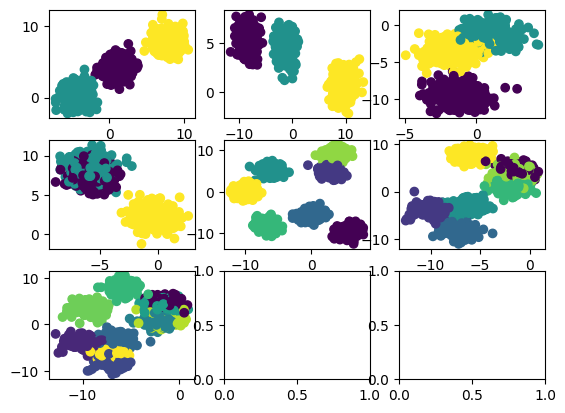

In [2]:
# Blobs for Experiment 1a
# First 3 blobs have 3 clusters
# Last 3 blobs have 7 clusters
blobs_1a = generate_experiment1a_blobs()
plot_blob_data(blobs_1a)

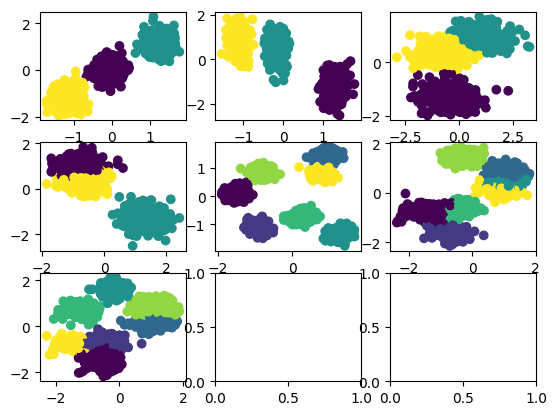

In [3]:
blobs_1a_with_predictions = list()
cluster_counts = [3,3,3,3,7,7,7]
counter =0
for blob in blobs_1a:
    aggC = AgglomerativeClustering(n_clusters= cluster_counts[counter], linkage="ward")
    counter += 1
    blobs_1a_with_predictions.append(
        (
            z_scale_np_array(blob[0]),
            aggC.fit_predict(blob[0])
        )
    )

plot_blob_data(blobs_1a_with_predictions)

In [4]:
sample_sizes = [128, 256, 512, 1024, 2048, 4096]
cluster_counts = [4, 8, 16, 32, 64, 128]
n = 100

ss_blob_dict, cc_blob_dict = generate_experiment1b_blobs(
    seed,
    sample_sizes,
    cluster_counts,
    n
)

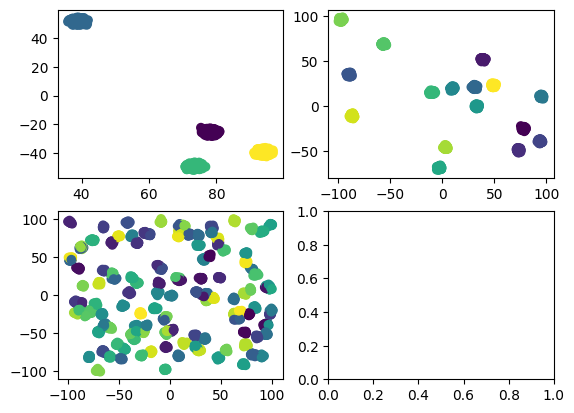

In [5]:
# Lets' take a plot of the representatives so that we have an idea of what's being generated
representative_blob_list_cc = [
    cc_blob_dict[4][0], cc_blob_dict[16][0], cc_blob_dict[128][0],
]
plot_blob_data(representative_blob_list_cc)

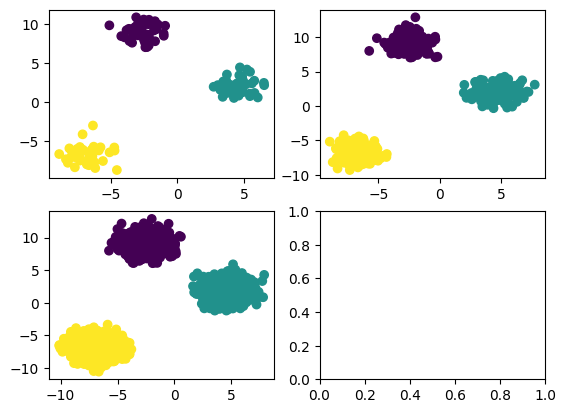

In [6]:
representative_blob_list_ss_3 = [
    ss_blob_dict[128][0], ss_blob_dict[512][0], ss_blob_dict[4096][0],
]
plot_blob_data(representative_blob_list_ss_3)

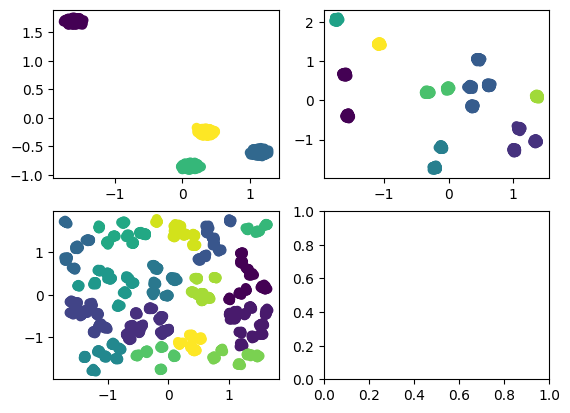

In [7]:
# See how these representatives are clustered
respresentative_with_predictions = list()
counter = 0
for blob in representative_blob_list_cc:
    # 4,8,16
    aggC = AgglomerativeClustering(n_clusters= cluster_counts[counter], linkage="ward")
    counter += 1
    respresentative_with_predictions.append(
        (
            z_scale_np_array(blob[0]),
            aggC.fit_predict(blob[0])
        )
    )

plot_blob_data(respresentative_with_predictions)

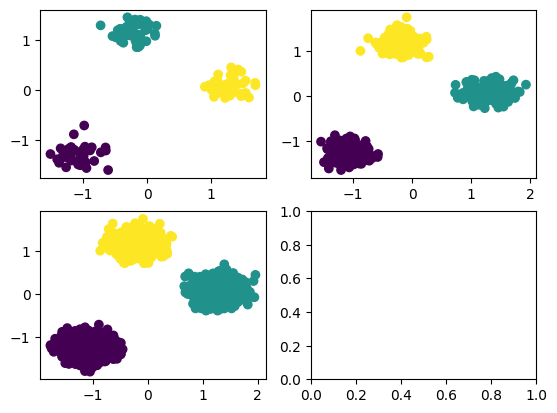

In [8]:
respresentative_with_predictions = list()
counter = 0
for blob in representative_blob_list_ss_3:
    # 3
    aggC = AgglomerativeClustering(n_clusters= 3, linkage="ward") # can be change
    counter += 1
    respresentative_with_predictions.append(
        (
            z_scale_np_array(blob[0]),
            aggC.fit_predict(blob[0])
        )
    )

plot_blob_data(respresentative_with_predictions)

# Experiment 1B: Evaluating average performance

0.900147890521901
0.6957345856768208


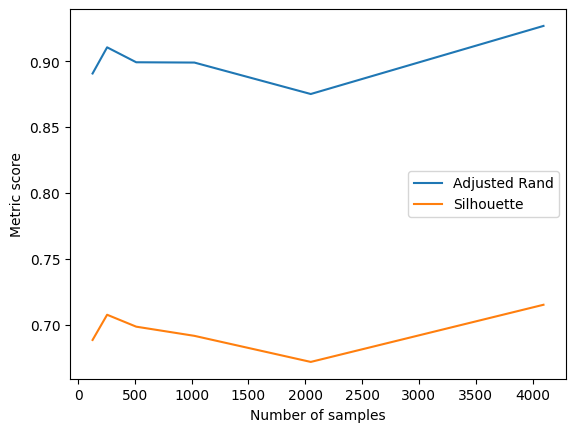

In [9]:
ss_ar_scores = list()
ss_sil_scores = list()
ss_average_times = list()
counter = 0
for ss in sample_sizes:
    sum_adjusted_rand = 0
    sum_sil = 0
    total_time = 0
    for blob in ss_blob_dict[ss]:
        start_time = time()
        aggC = AgglomerativeClustering(n_clusters= 3, linkage="ward") # can be any linkage honestly
        pred = aggC.fit_predict(z_scale_np_array(blob[0]))
        sum_adjusted_rand += adjusted_rand_score(blob[1], pred)
        sum_sil += silhouette_score(blob[0], pred)
        total_time += time() - start_time
    average_adjusted_rand = sum_adjusted_rand / n
    average_sil = sum_sil / n
    average_time = total_time / n

    ss_ar_scores.append(average_adjusted_rand)
    ss_sil_scores.append(average_sil)
    ss_average_times.append(average_time)
    counter +=1

ss_overall_average_ar = sum(ss_ar_scores)/len(sample_sizes)
print(ss_overall_average_ar)

ss_overall_average_sil = sum(ss_sil_scores)/len(sample_sizes)
print(ss_overall_average_sil)

plt.xlabel("Number of samples")
plt.ylabel("Metric score")

plt.plot(sample_sizes, ss_ar_scores, label="Adjusted Rand")
plt.plot(sample_sizes, ss_sil_scores, label="Silhouette")

plt.legend()
plt.show()
# No apparent pattern for different sample sizes

0.9856061771856828
0.8672930549848966


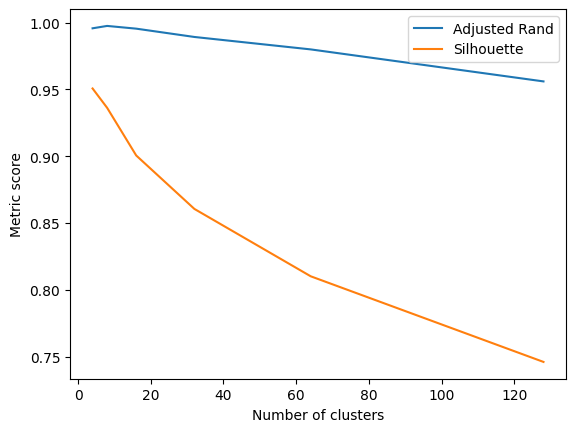

In [10]:
cc_ar_scores = list()
cc_sil_scores = list()
cc_average_times = list()
counter = 0
for cc in cluster_counts:
    sum_adjusted_rand = 0
    sum_sil = 0
    total_time = 0
    for blob in cc_blob_dict[cc]: # 1 cluster size have 100 samples
        start_time = time()
        aggC = AgglomerativeClustering(n_clusters= cc, linkage="ward") # can be any linkage honestly
        pred = aggC.fit_predict(z_scale_np_array(blob[0]))
        sum_adjusted_rand += adjusted_rand_score(blob[1], pred)
        sum_sil += silhouette_score(blob[0], pred)
        total_time += time() - start_time
    average_adjusted_rand = sum_adjusted_rand / n
    average_sil = sum_sil / n
    average_time = total_time / n

    cc_ar_scores.append(average_adjusted_rand)
    cc_sil_scores.append(average_sil)
    cc_average_times.append(average_time)
    counter +=1

cc_overall_average_ar = sum(cc_ar_scores)/len(sample_sizes)
print(cc_overall_average_ar)

cc_overall_average_sil = sum(cc_sil_scores)/len(sample_sizes)
print(cc_overall_average_sil)

plt.xlabel("Number of clusters")
plt.ylabel("Metric score")

plt.plot(cluster_counts, cc_ar_scores, label="Adjusted Rand")
plt.plot(cluster_counts, cc_sil_scores, label="Silhouette")

plt.legend()
plt.show()
# Adjusted rand score and silhouette score decrease as the number
# of cluster increases
# Possible explanations are that HDBSCAN performance worsens as
# number of clusters increase or
# the way we generate the data might be the reason for this degradation

In [11]:
aggC_average_ar = (cc_overall_average_ar + ss_overall_average_ar)/2
aggC_average_sil = (cc_overall_average_sil + ss_overall_average_sil)/2
aggC_average_ar, aggC_average_sil

(0.942877033853792, 0.7815138203308587)

# Experiment 2: Determining algorithm complexity with respect to number of samples and number of clusters

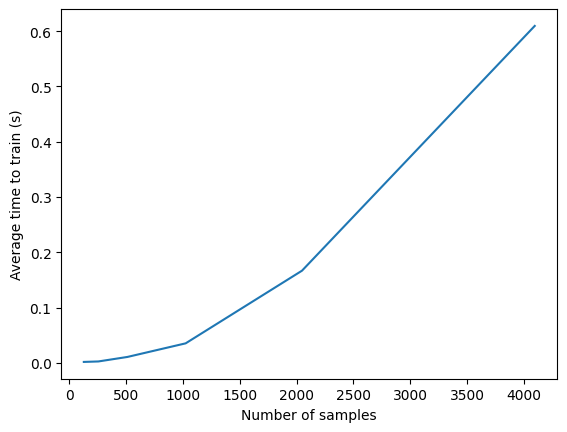

In [12]:
plt.xlabel("Number of samples")
plt.ylabel("Average time to train (s)")
plt.plot(sample_sizes, ss_average_times)
# Possibly O(n^2) complexity

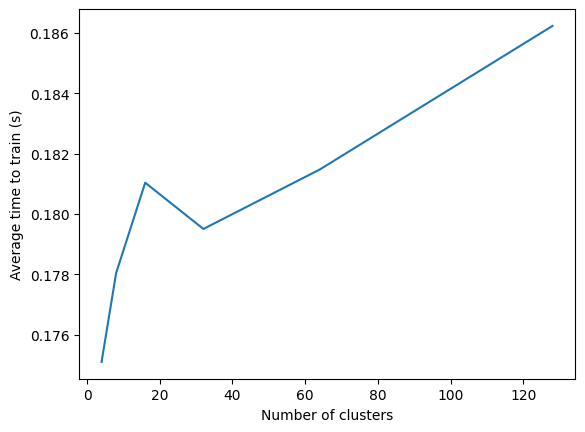

In [13]:
plt.xlabel("Number of clusters")
plt.ylabel("Average time to train (s)")
plt.plot(cluster_counts, cc_average_times)
# Complexity is not apparent, plateau at around 20 clusters

# Experiment 3A: Real world problems

The datasets that we will be using shows a combination of all/some of these traits
- Non-linearly separable
- Noise points
- Varying cluster density
- Overlapping of clusters

## Worms
It's a plot with an exterme amount of noise points. I'm guessing it would be difficult for the clustering algorithms to determine the clusters. It has 1 million rows, so training might take a while.

In [3]:
worms_df = pd.read_csv("./data/worms/worms_2d.txt", sep=" ", header=None)
worms_df

0       1
0       4260.1  3476.0
1       4276.3  3475.6
2       4260.2  3475.3
3       4244.4  3494.8
4       4270.0  3467.1
...        ...     ...
105595  3567.9  3583.4
105596  3383.9  3897.8
105597  3259.6  2970.7
105598  2688.7  2958.6
105599  4095.2  2344.0

[105600 rows x 2 columns]

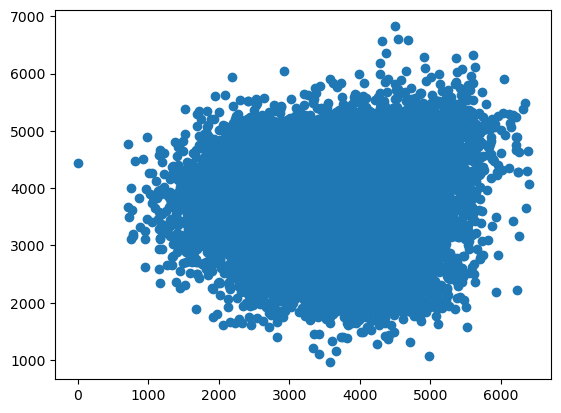

In [4]:
worms_arr = worms_df.to_numpy()
worms_arr_scaled = z_scale_np_array(worms_arr)
xs, ys = zip(*worms_arr)
plt.scatter(xs, ys)
# I can barely make out any clusters

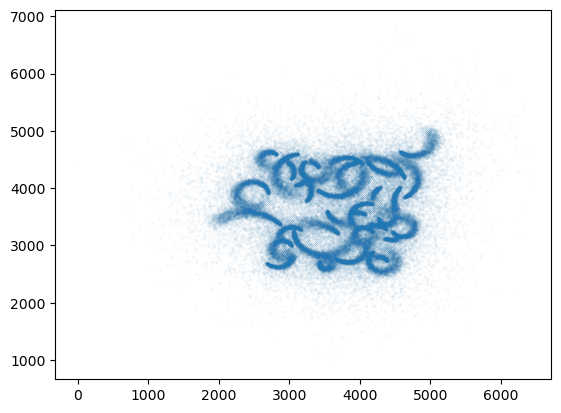

In [5]:
# Reduce the size of the points
plt.scatter(xs, ys, s=0.001)

In [6]:
aggC = AgglomerativeClustering(n_clusters= 15, linkage="ward")
worms_predictions = aggC.fit_predict(worms_arr_scaled)
plt.scatter(xs, ys, c=worms_predictions, s=0.001)
plt.show()

MemoryError: Unable to allocate 41.5 GiB for an array with shape (5575627200,) and data type float64

In [24]:
def aggClus_tuning_with_cdbw(X, X_scaled, min_cluster_sizes, n_neighbours):
    from cdbw import CDbw
    pred_w_score = list()
    linkages = ['ward', 'complete', 'average', 'single']
    metrics = ["euclidean","cosine", "cityblock"]
    
    from sklearn.neighbors import kneighbors_graph
    
    for i in range(1,n_neighbours+1):
        knn_graph = kneighbors_graph(X_scaled, i, include_self=False)
        for n_cluster in range(2, min_cluster_sizes+1):
            n_cluster = min_cluster_sizes
            for linkage in linkages:
                for metric in metrics:
                    if linkage == "ward" and metric != "euclidean":
                        continue
                    aggClust1 = AgglomerativeClustering(
                        n_clusters= n_cluster, 
                        linkage=linkage, 
                        metric=metric
                    )
                    X_predictions = aggClust1.fit_predict(X_scaled)
                    cdbw_score = CDbw(X, X_predictions)
                    pred_w_score.append((cdbw_score, X_predictions, n_cluster, linkage, metric, n_neighbours))
    
    maxi = max(pred_w_score, key = lambda x: x[0])
    ans_dict = {
        "cdbw_score":maxi[0],
        "X_predictions":maxi[1],
        "n_cluster":maxi[2],
        "linkage":maxi[3],
        "metric":maxi[4],
        "n_neighbours":maxi[5]
    }
    return ans_dict

In [12]:
def aggClusterMod(X1, n_clusters, n_neighbours):
    linkages = ['ward', 'complete', 'average', 'single']
    metrics = ["euclidean","cosine", "cityblock"]

    fig, ax = plt.subplots(8, 3, figsize = (15,24))
    fig.tight_layout(pad=3.0)

    from sklearn.neighbors import kneighbors_graph
    knn_graph = kneighbors_graph(X1, n_neighbours, include_self=False)
    a = 0
    b = 0
    for connectivity in (None, knn_graph):
        for linkage in linkages:
            for metric in metrics:
                if linkage == "ward" and metric != "euclidean":
                    b +=1
                    if b == 3:
                        b = 0
                        a += 1
                    continue
                aggClust1 = AgglomerativeClustering(
                    n_clusters= n_clusters, 
                    linkage=linkage, 
                    connectivity=connectivity, 
                    metric=metric
                )
                cluster1 = aggClust1.fit_predict(X1)
                ax[a,b].scatter(x = X1[:,0], y= X1[:,1], c = cluster1)
                ax[a,b].set(xlabel='$x1$', ylabel = '$x2$')
                ax[a,b].set_title('{},{},{}'.format(linkage, connectivity != None, metric))
                b +=1
                if b == 3:
                    b = 0
                    a += 1

# T48K

Non linearly separable data set with some noise points

In [25]:
t48k_df = pd.read_csv("./data/t48k.txt", sep=" ")
t48k_df

8000           2
0      68.601997  102.491997
1     454.665985  264.808990
2     101.283997  169.285995
3     372.614990  263.140991
4     300.989014   46.555000
...          ...         ...
7995  442.420990  303.721985
7996  495.451996  288.502991
7997  267.605011  141.725006
7998  238.358002  252.729996
7999  159.242004  177.431000

[8000 rows x 2 columns]

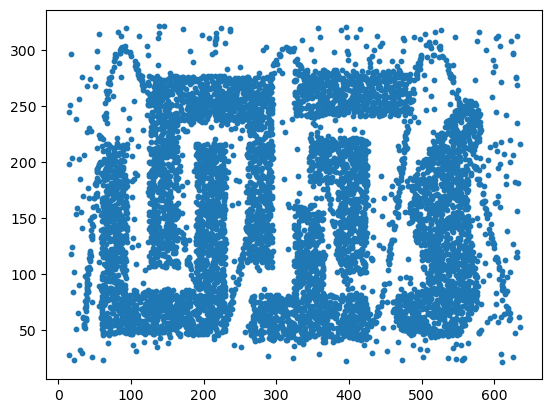

In [26]:
t48k_arr = t48k_df.to_numpy()
t48k_arr_scaled = z_scale_np_array(t48k_arr)
xs, ys = zip(*t48k_arr)
plt.scatter(xs, ys, s=10)

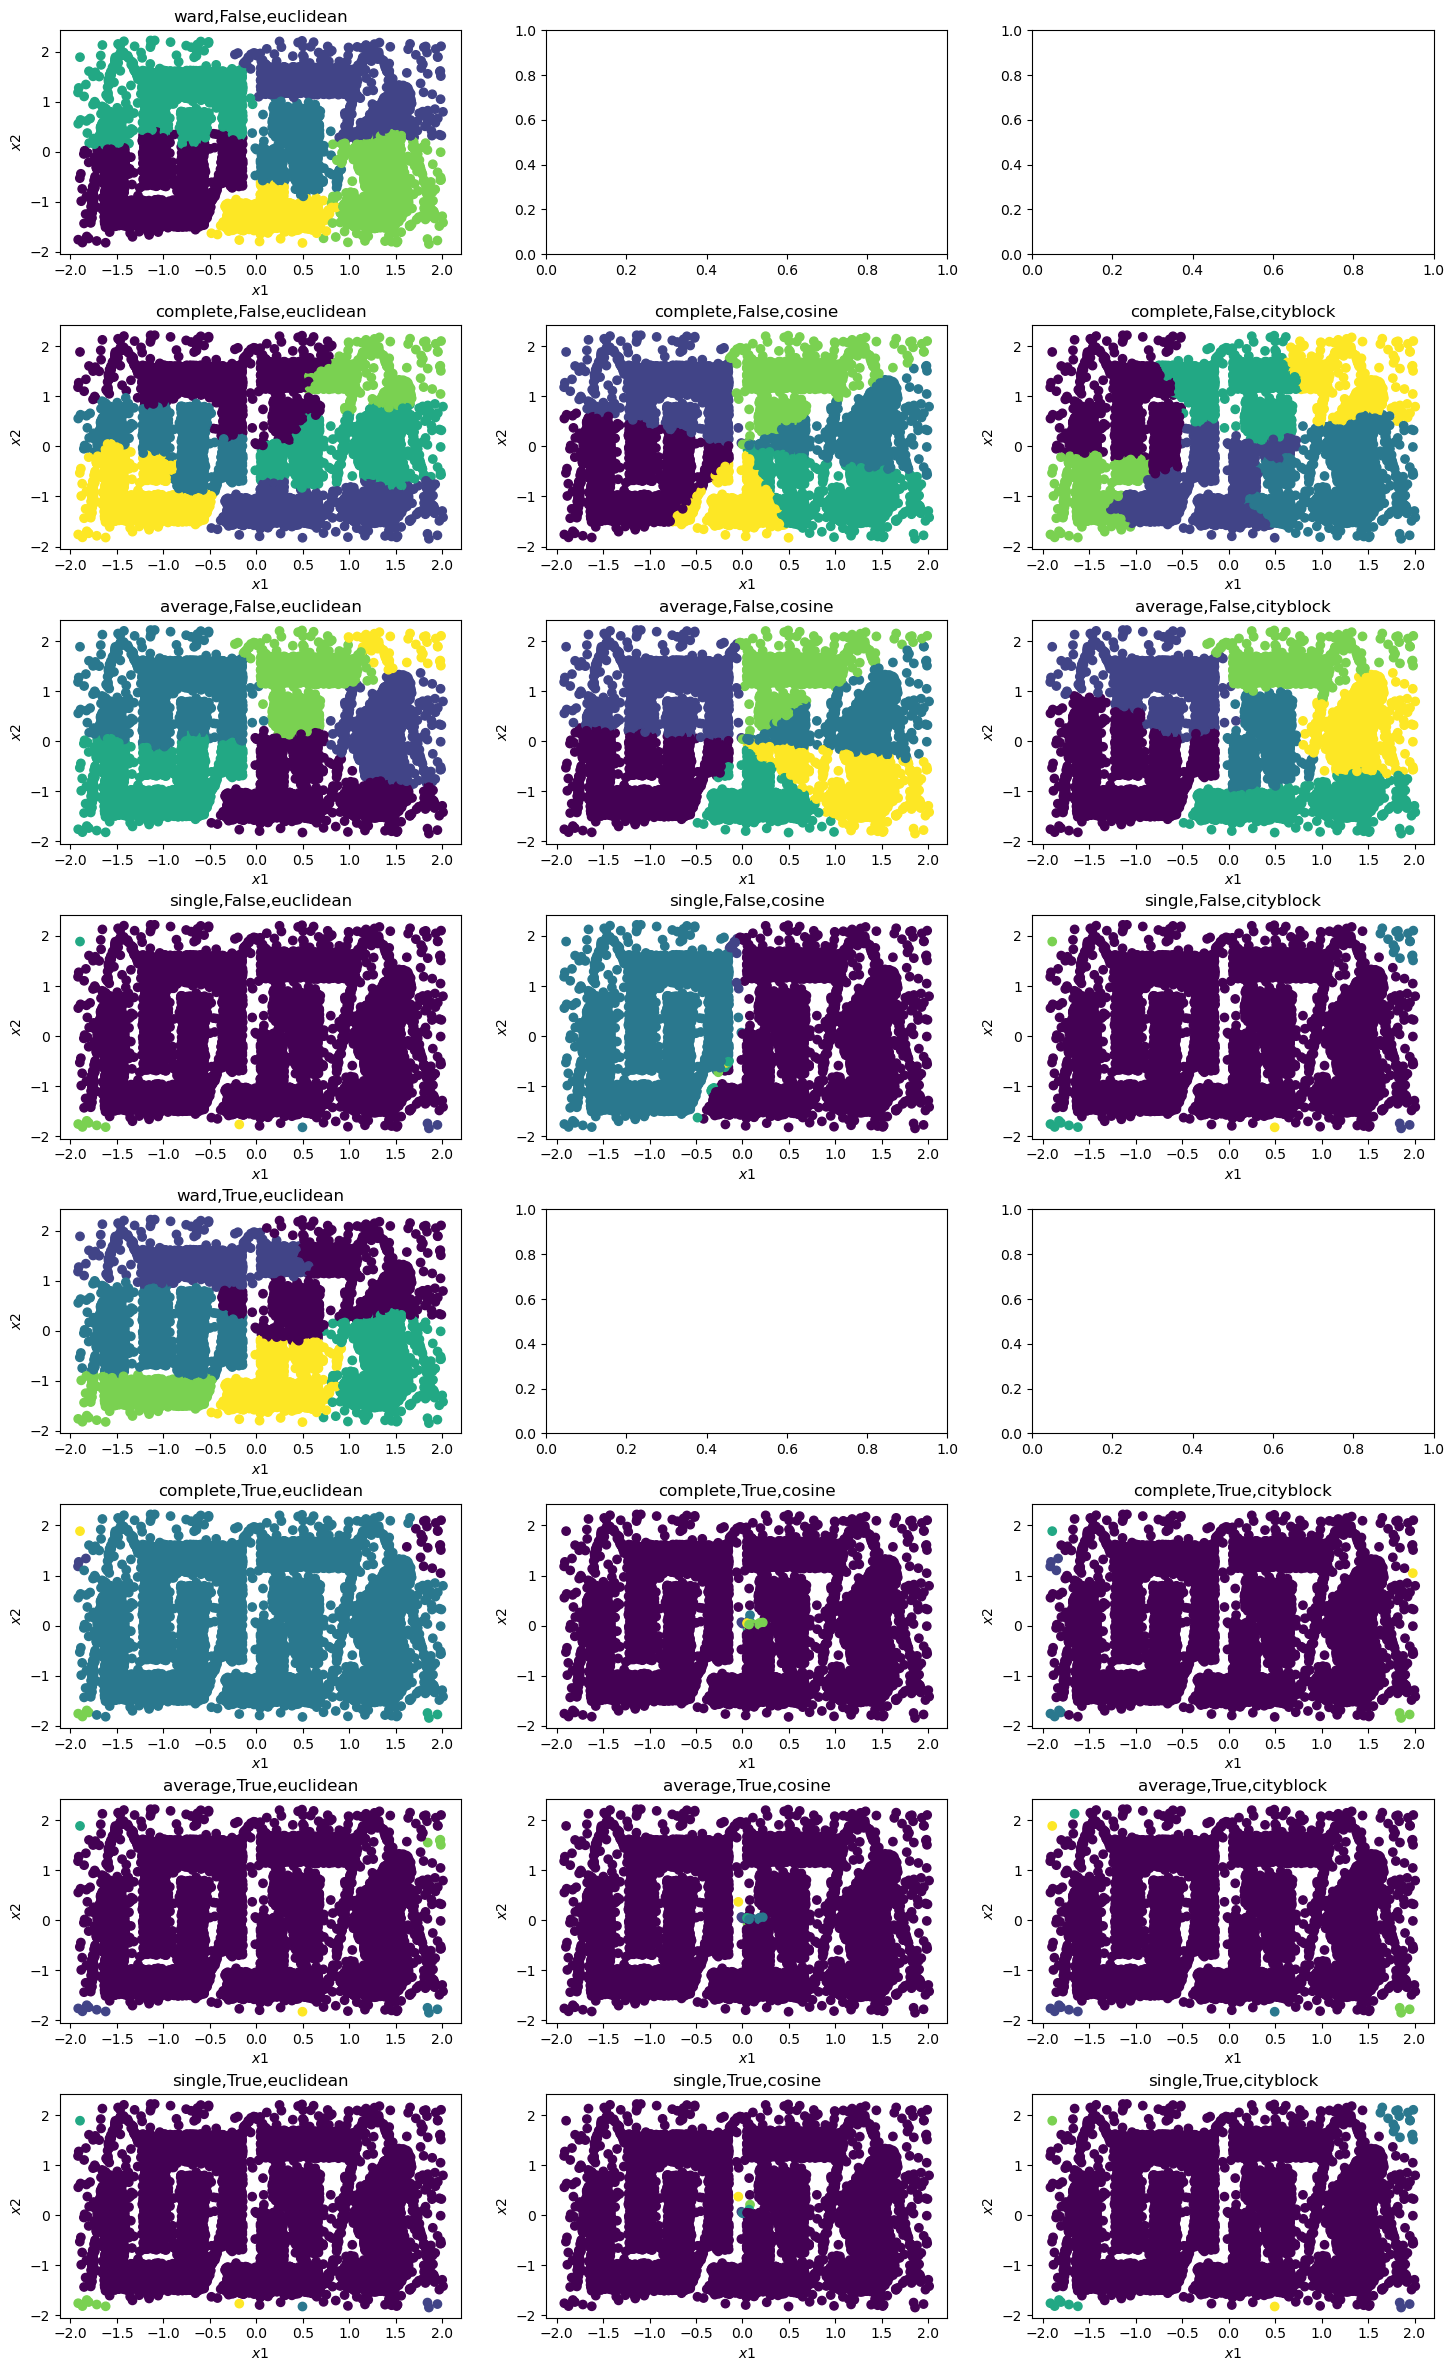

In [38]:
aggClusterMod(t48k_arr_scaled, 6, 6)

In [27]:
tmp = aggClus_tuning_with_cdbw(t48k_arr, t48k_arr_scaled, 6,10)

In [28]:
print(tmp)

{'cdbw_score': 0.00032627260690254516, 'X_predictions': array([0, 1, 3, ..., 0, 3, 0], dtype=int64), 'n_cluster': 6, 'linkage': 'ward', 'metric': 'euclidean', 'n_neighbours': 10}


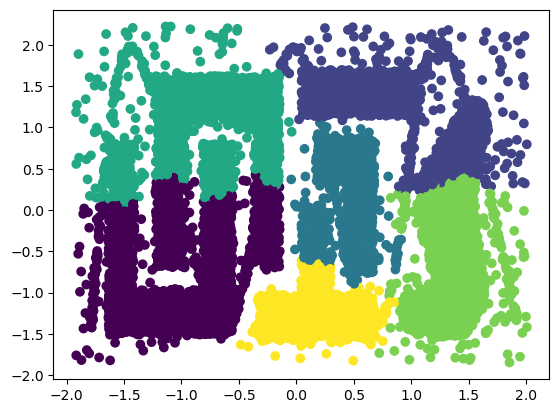

In [29]:
plt.scatter(x = t48k_arr_scaled[:,0], y= t48k_arr_scaled[:,1], c = tmp['X_predictions'])

# Jain

Differing cluster density

In [30]:
jain_df = pd.read_csv("./data/jain.txt", sep="\t", header=None)
jain_df

0      1  2
0     0.85  17.45  2
1     0.75  15.60  2
2     3.30  15.45  2
3     5.25  14.20  2
4     4.90  15.65  2
..     ...    ... ..
368  38.75  16.85  1
369  39.00  16.60  1
370  38.25  17.35  1
371  39.50  16.95  1
372  39.90  17.05  1

[373 rows x 3 columns]

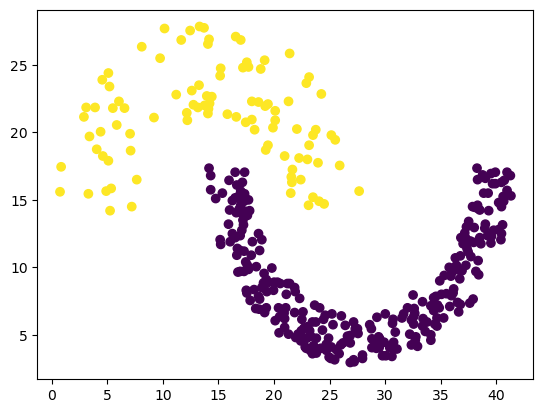

In [31]:
jain_arr = jain_df.to_numpy()
jain_arr_scaled = z_scale_np_array(jain_arr)
xs, ys, cs = zip(*jain_arr)
plt.scatter(xs, ys, c=cs)

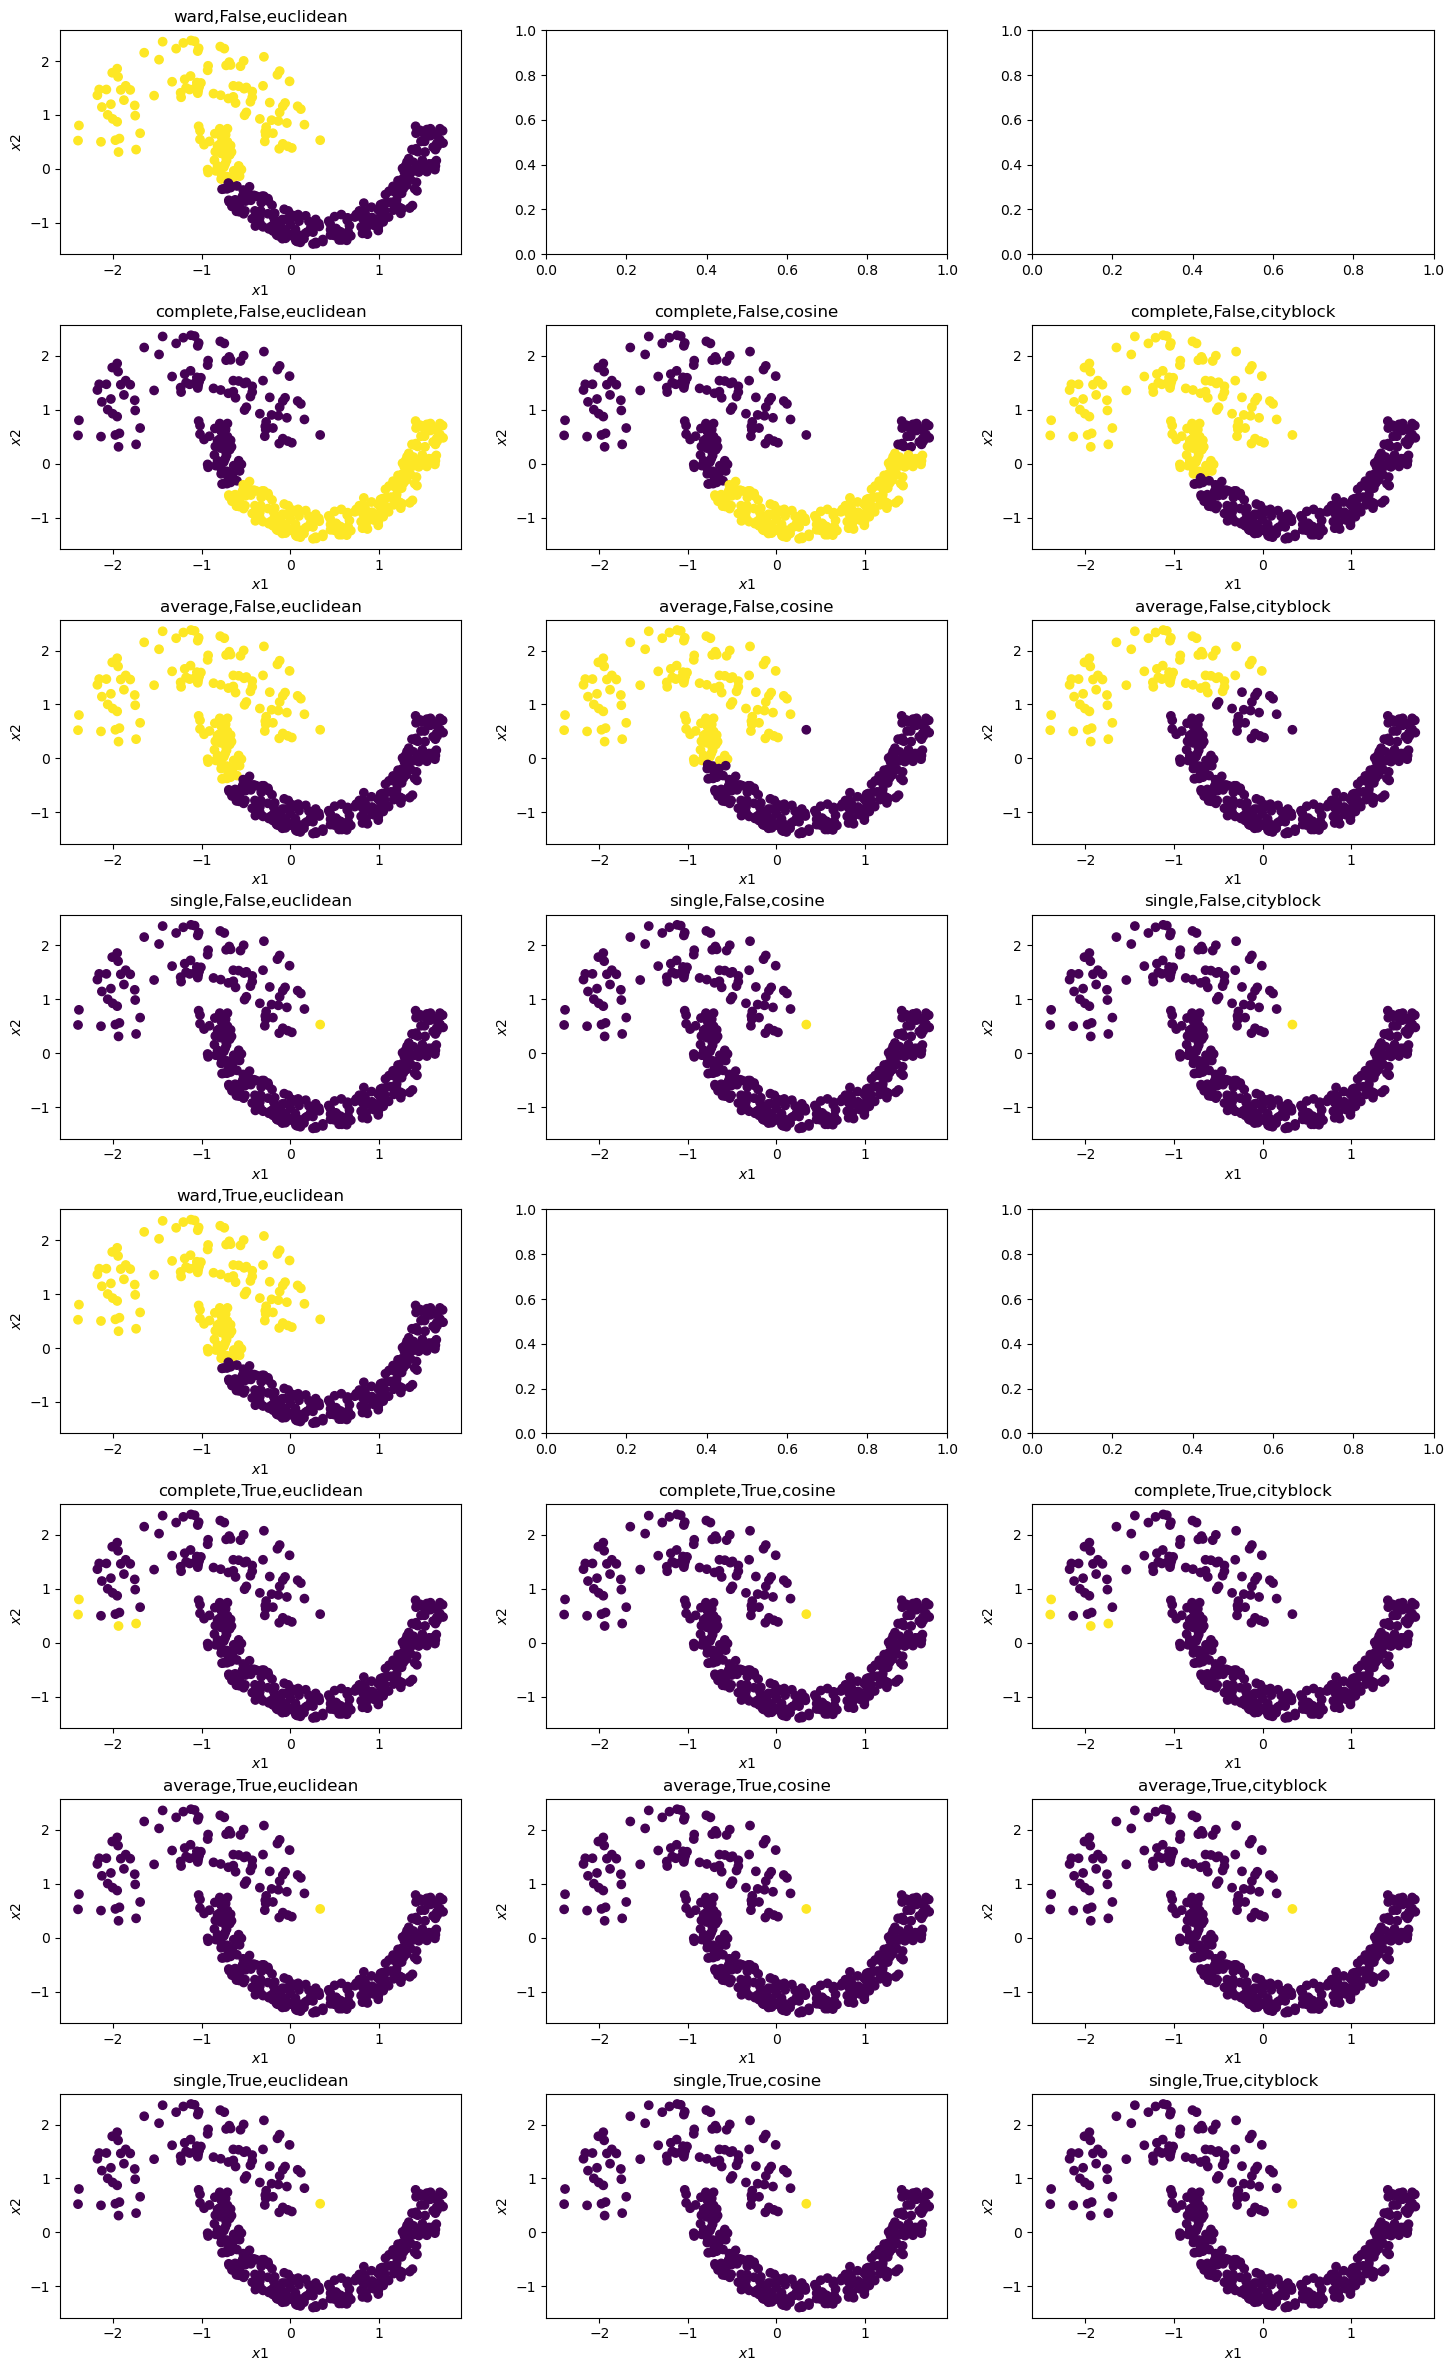

In [21]:
aggClusterMod(jain_arr_scaled[:,:2], 2, 6)

In [32]:
tmp = aggClus_tuning_with_cdbw(jain_arr[:,:2], jain_arr_scaled[:,:2], 2,10)

In [33]:
print(tmp)

{'cdbw_score': 0.006016137911496834, 'X_predictions': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

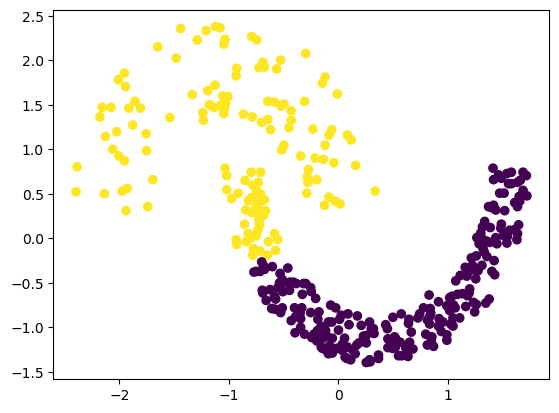

In [34]:
plt.scatter(x = jain_arr_scaled[:,0], y= jain_arr_scaled[:,1], c = tmp['X_predictions'])

# Path-based

Non-linearly separable and several clusters are inside one cluster

In [35]:
pathbased_df = pd.read_csv("./data/pathbased.txt", sep="\t", header=None)
pathbased_df

0      1  2
0    11.25   5.05  1
1    10.95   4.70  1
2     9.85   5.80  1
3     9.80   5.75  1
4     9.15   6.80  1
..     ...    ... ..
295  17.50  18.05  2
296  16.65  17.50  2
297  15.45  17.30  2
298  15.45  17.80  2
299  15.70  18.40  2

[300 rows x 3 columns]

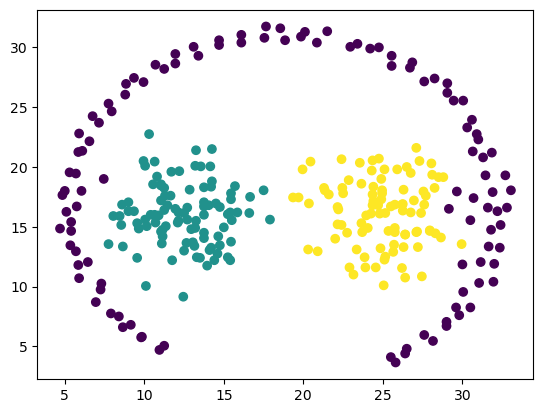

In [36]:
pathbased_arr = pathbased_df.to_numpy()
pathbased_arr_scaled = z_scale_np_array(pathbased_arr)
xs, ys, cs = zip(*pathbased_arr)
plt.scatter(xs, ys, c=cs)

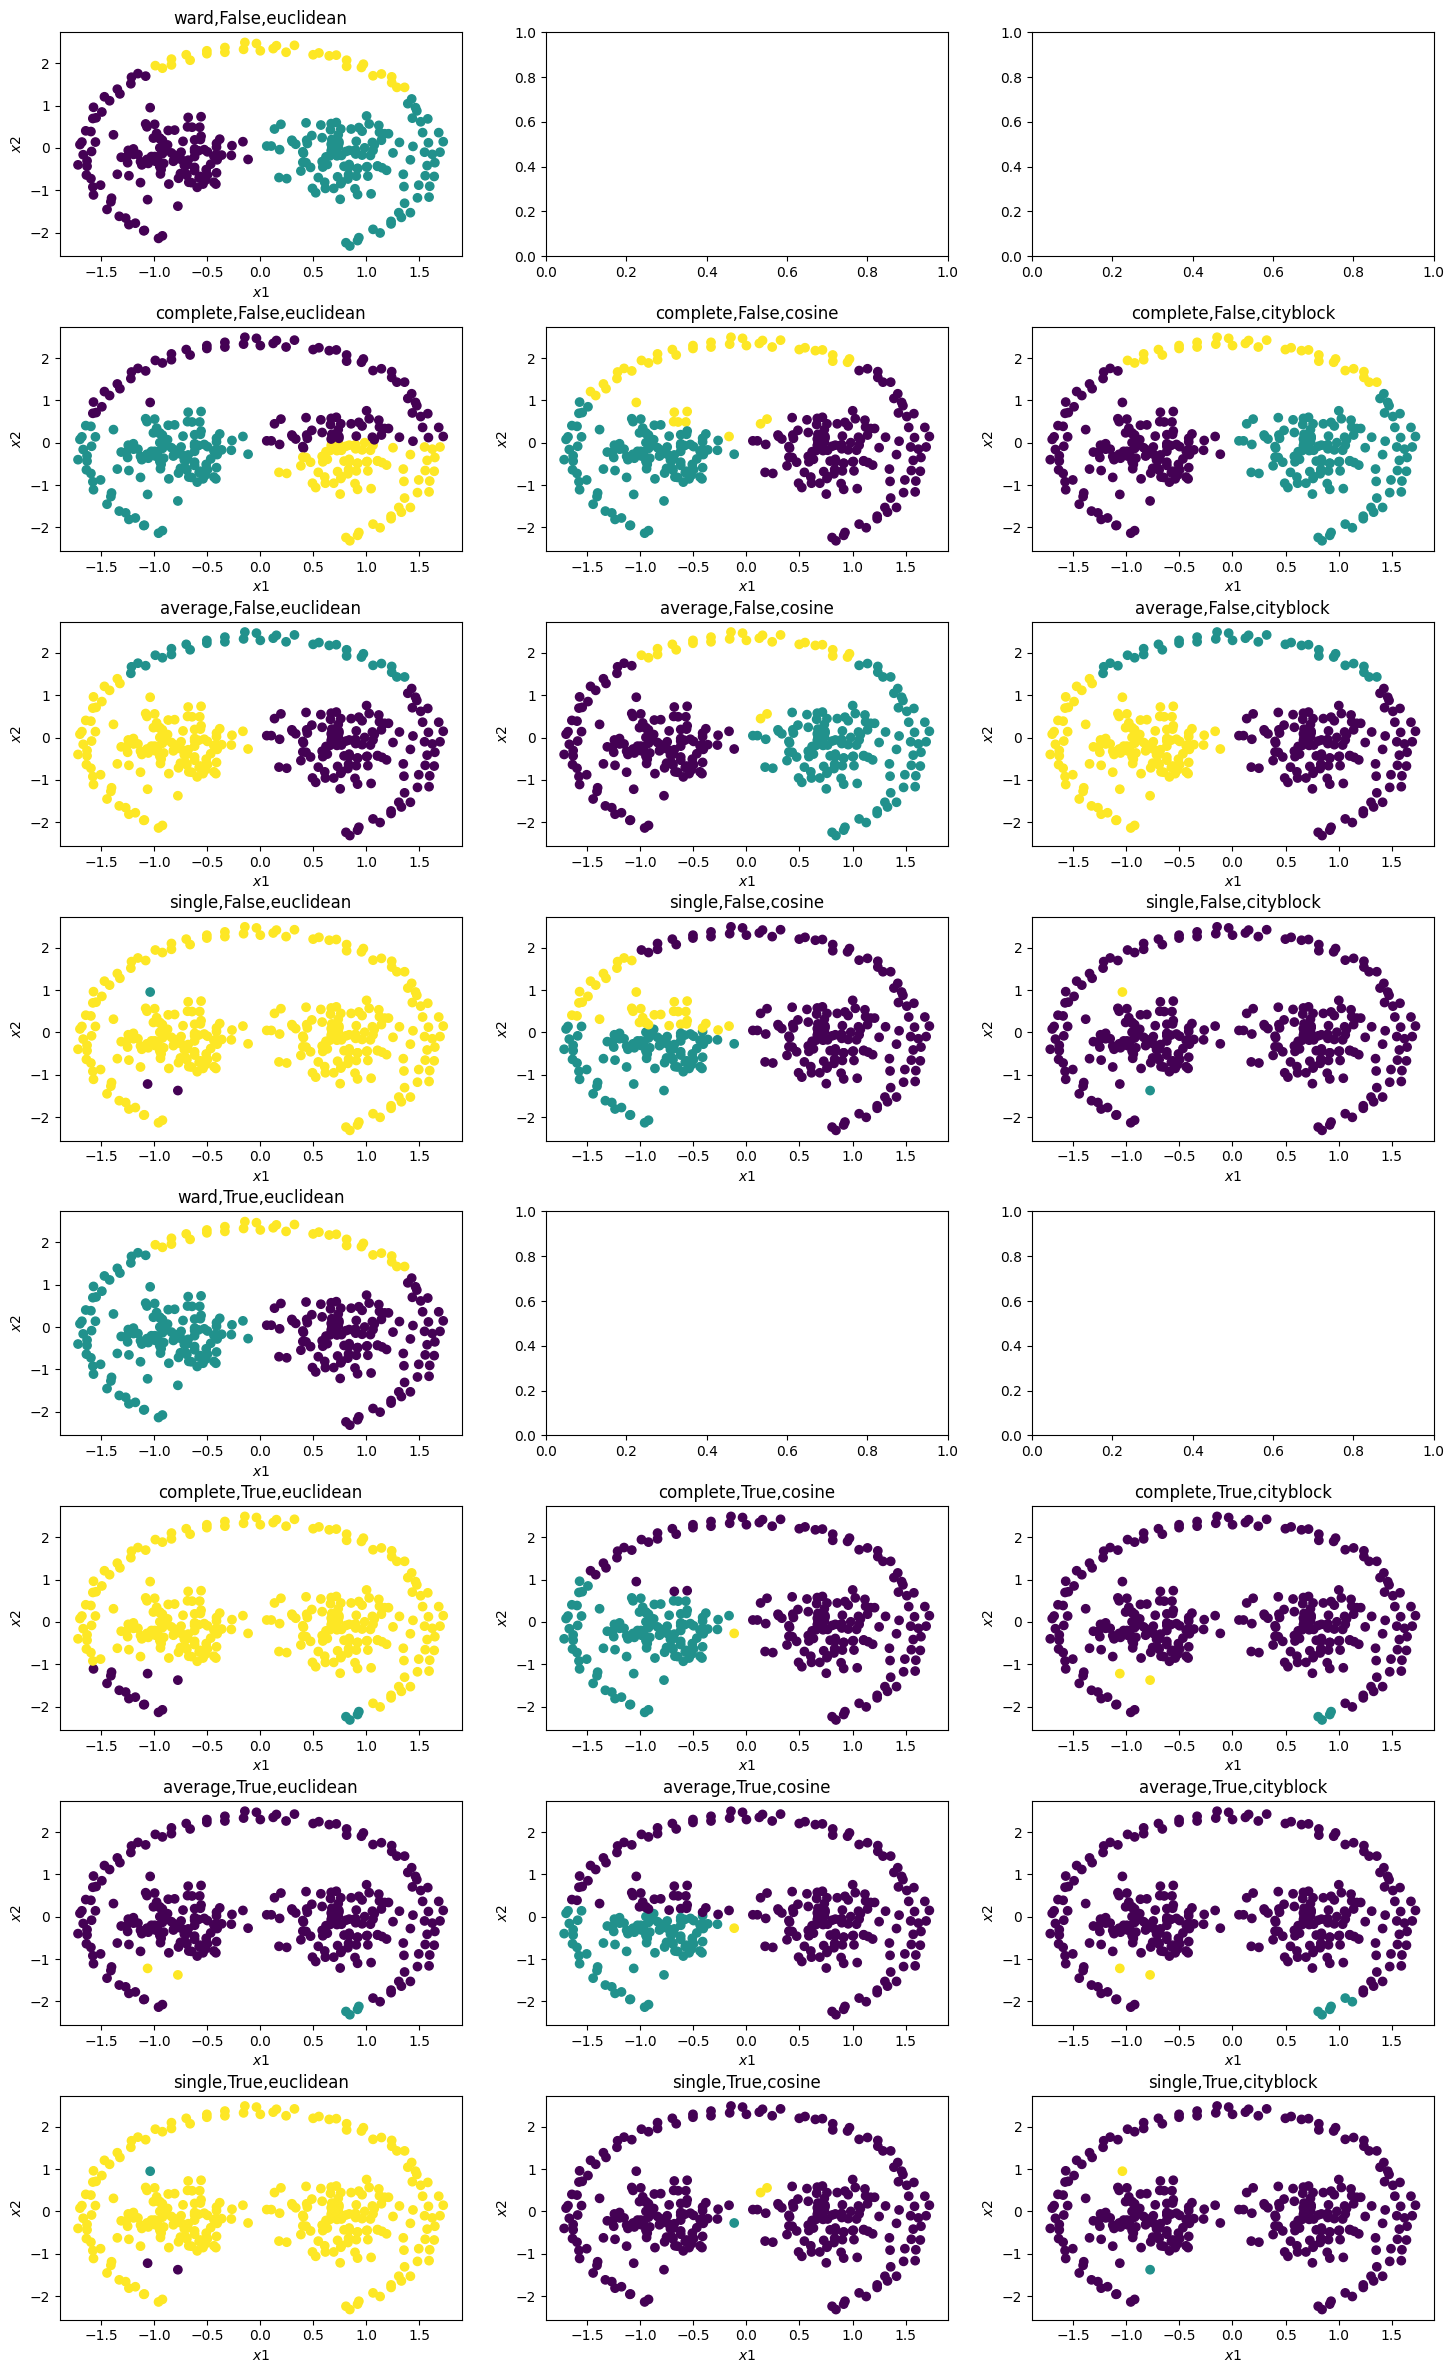

In [19]:
aggClusterMod(pathbased_arr_scaled[:,:2], 3, 6)

In [37]:
tmp = aggClus_tuning_with_cdbw(pathbased_arr[:,:2], pathbased_arr_scaled[:,:2], 3,10)

In [38]:
print(tmp)

{'cdbw_score': 0.011866188716304519, 'X_predictions': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 

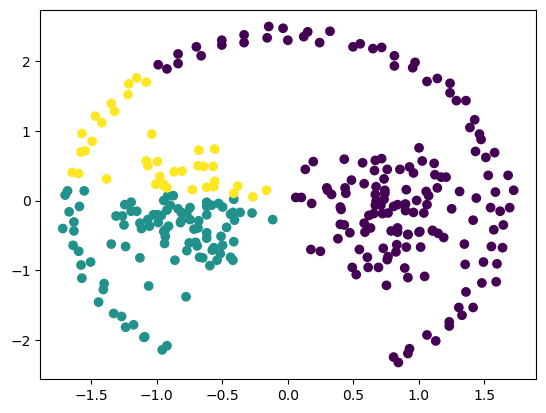

In [39]:
plt.scatter(x = pathbased_arr_scaled[:,0], y= pathbased_arr_scaled[:,1], c = tmp['X_predictions'])

# Unbalenced data

In [40]:
unbalance_df = pd.read_csv("./data/unbalance2.txt", sep=" ", header=None)
unbalance_df

0       1
0     151700  351102
1     155799  354358
2     142857  352716
3     152726  349144
4     151008  349692
...      ...     ...
6495  218990  412773
6496  213767  393738
6497  226754  394768
6498  221605  396515
6499  207319  397961

[6500 rows x 2 columns]

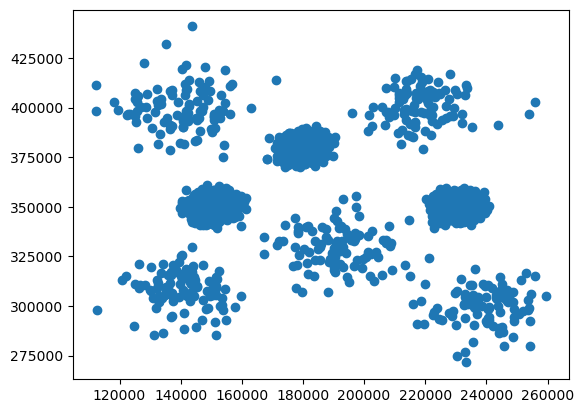

In [41]:
unbalance_arr = unbalance_df.to_numpy()
unbalance_arr_scaled = z_scale_np_array(unbalance_arr)
xs, ys = zip(*unbalance_arr)
plt.scatter(xs, ys)

C:\Users\Hp\anaconda3\envs\AssignmentEnv\Lib\site-packages\sklearn\cluster\_agglomerative.py:303: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
C:\Users\Hp\anaconda3\envs\AssignmentEnv\Lib\site-packages\sklearn\cluster\_agglomerative.py:574: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
C:\Users\Hp\anaconda3\envs\AssignmentEnv\Lib\site-packages\sklearn\cluster\_agglomerative.py:574: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
C:\Users\Hp\anaconda3\envs\AssignmentEnv\Lib\site-packages\sklearn\cluster\_agglomerative.py:574: UserWarning: the number of co

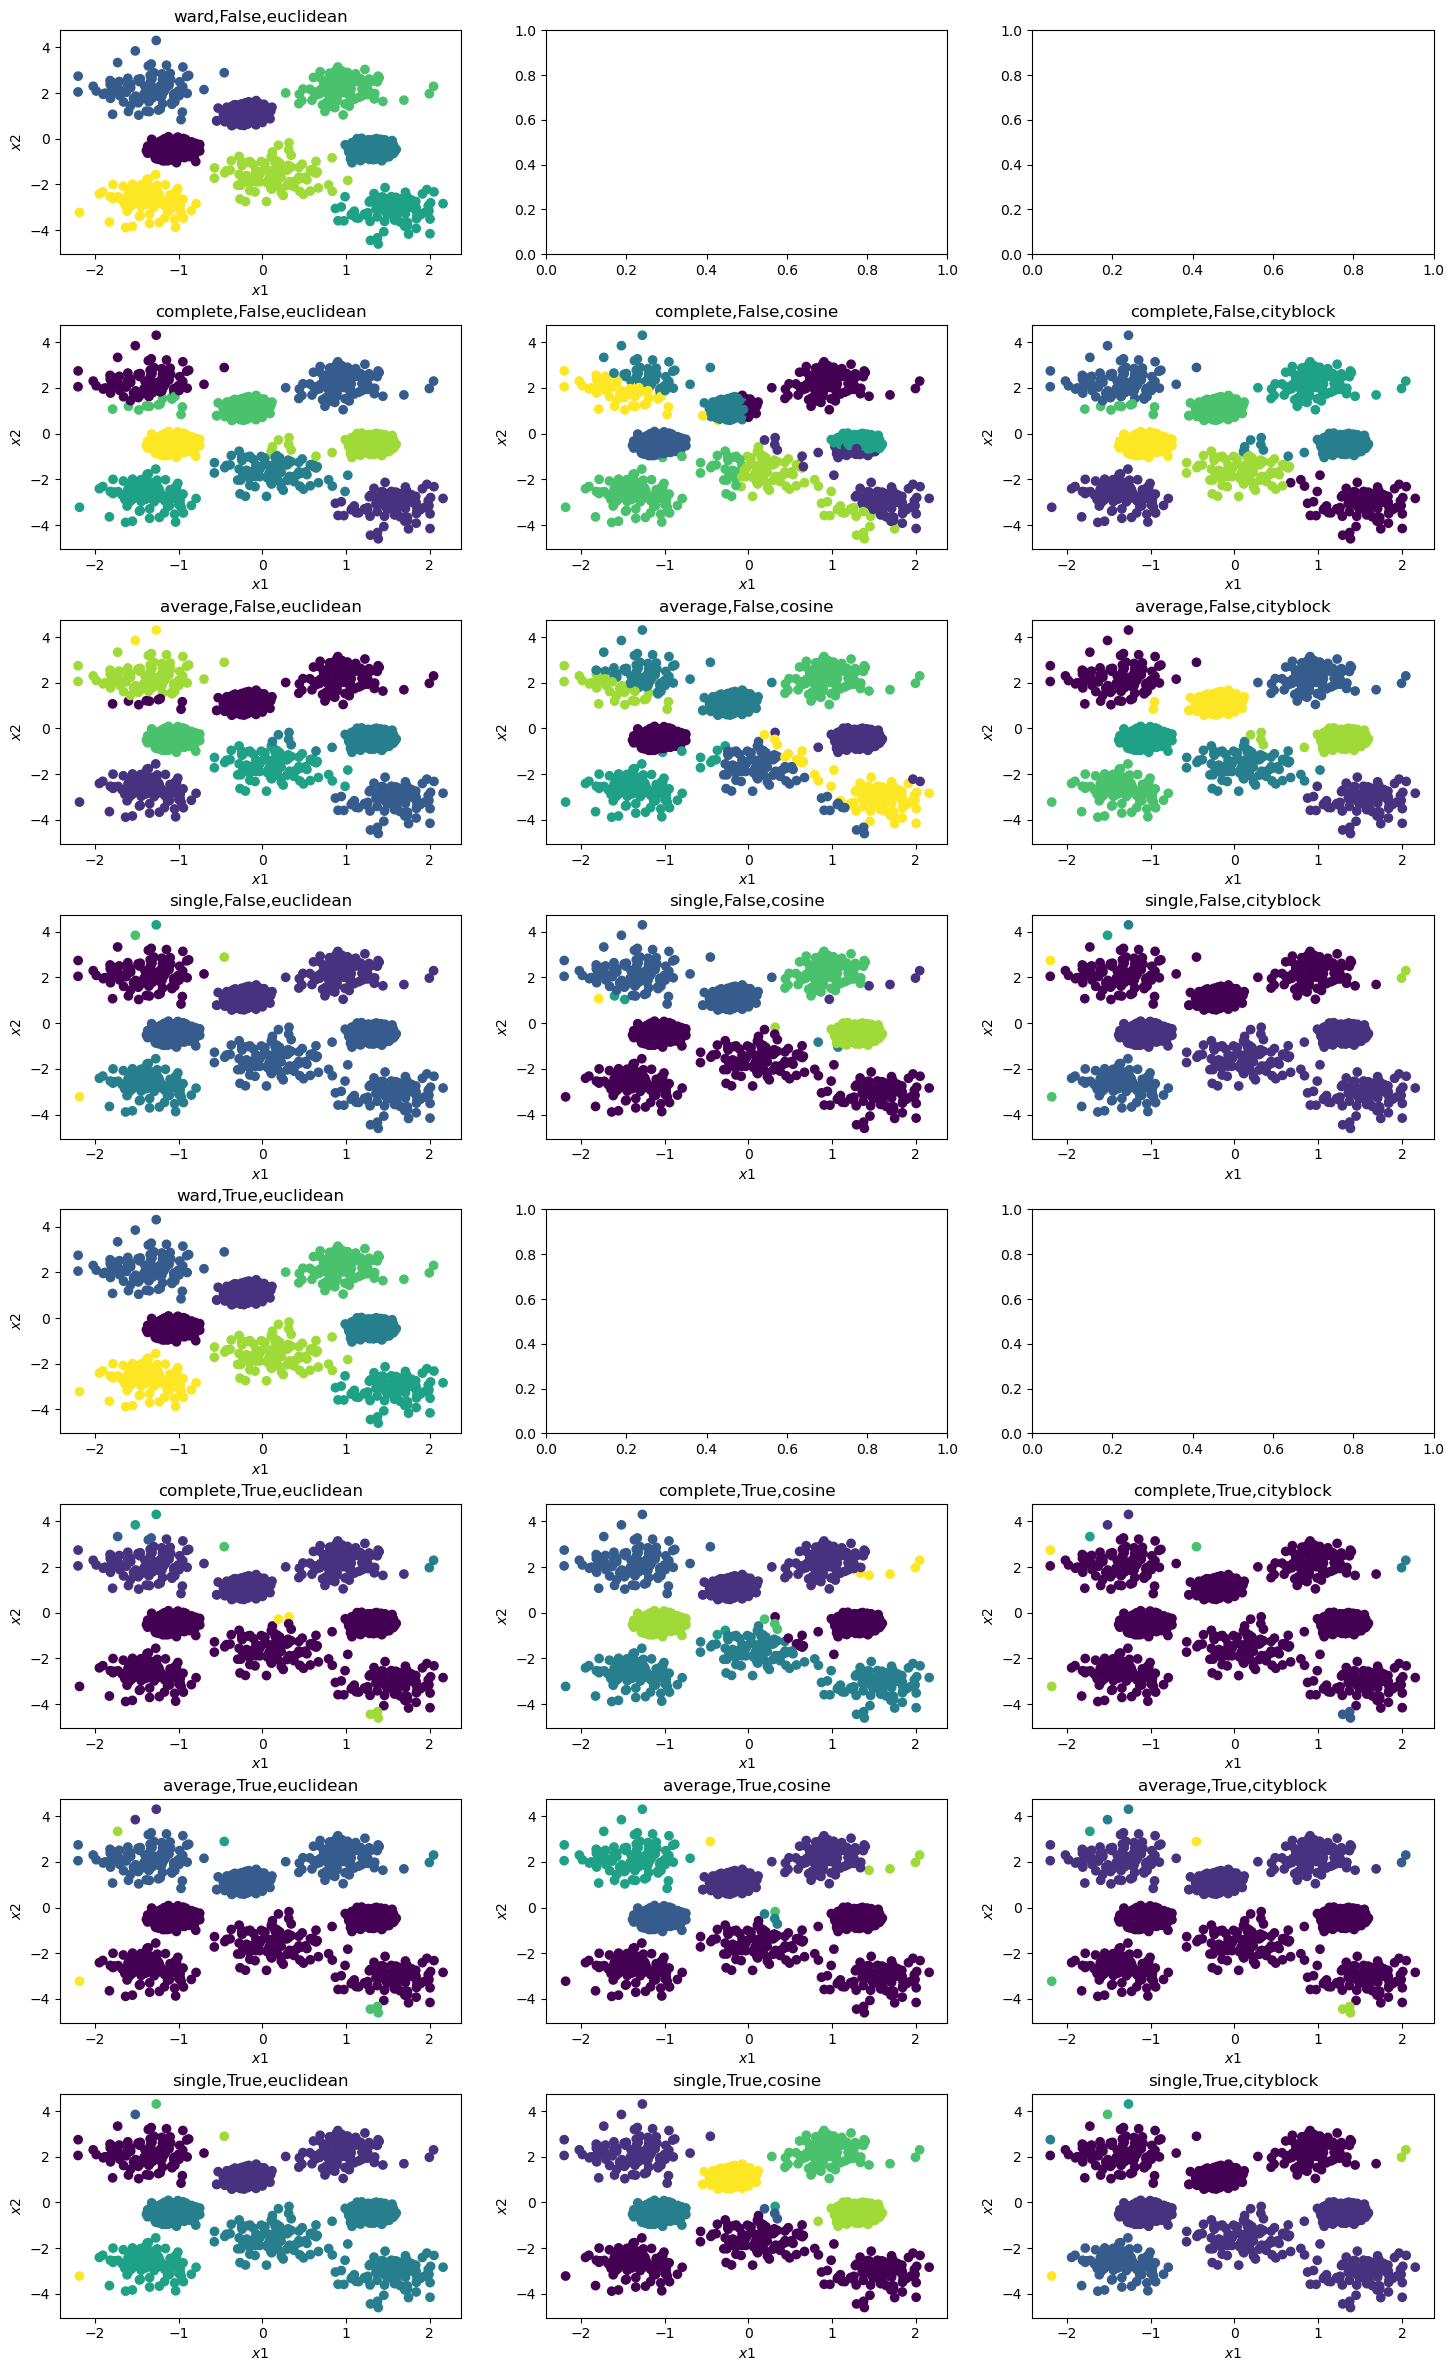

In [68]:
aggClusterMod(unbalance_arr_scaled, 8, 6)

In [42]:
tmp = aggClus_tuning_with_cdbw(unbalance_arr, unbalance_arr_scaled, 8,10)

In [71]:
print(tmp)

{'cdbw_score': 1.8889562930514213e-05, 'X_predictions': array([0, 0, 0, ..., 5, 5, 5], dtype=int64), 'n_cluster': 8, 'linkage': 'ward', 'metric': 'euclidean'}


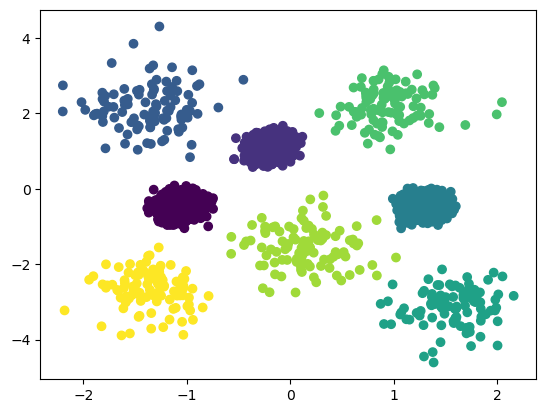

In [72]:
plt.scatter(x = unbalance_arr_scaled[:,0], y= unbalance_arr_scaled[:,1], c = tmp['X_predictions'])